BV

# Activity 1
Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

1. check if there are highly correlated features and drop them if there are any.
2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).
3. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
    1. X-y split (y is the target variable which is the total claim amount)
    2. (optional) remove the outliers from the numerical columns.

We have the Total Complain amount
Why we need a model to predict the Total Complain amount? = we need the historic data to predict the total claim amount for the news customers but with new characteristiques.

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):display(Markdown(string))
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [43]:
def load_original_data():
    filename = "Data_Marketing_Customer_Analysis_Round3.csv"
    file1 = pd.read_csv(filename, index_col=False)
    #hk_df = pd.read_csv(filename, index_col=False)
    return file1

## Pipeline Controller

In [44]:
hk_df =load_original_data()

## Reading the dataframe

In [45]:
hk_df = load_original_data()

### check if there are highly correlated features and drop them if there are any

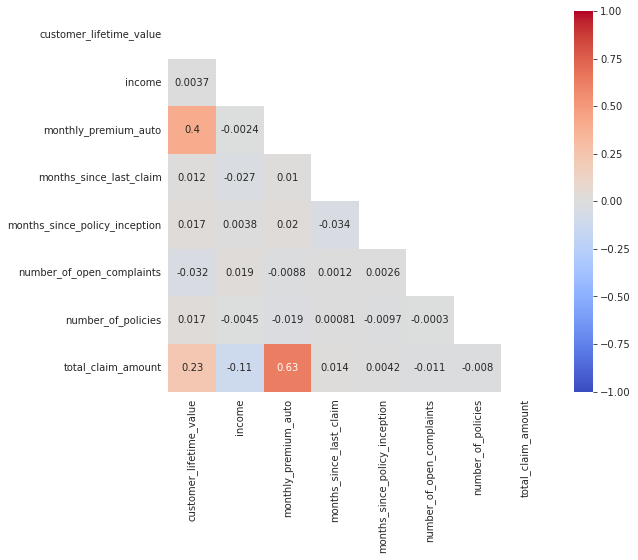

In [46]:
corr = hk_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [47]:
df_cat= hk_df.select_dtypes("object")

cat_val=pd.get_dummies(df_cat, drop_first=True)
cat_val

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


## Select numerical data

Get the numeric data into dataframe called `numerical` 
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

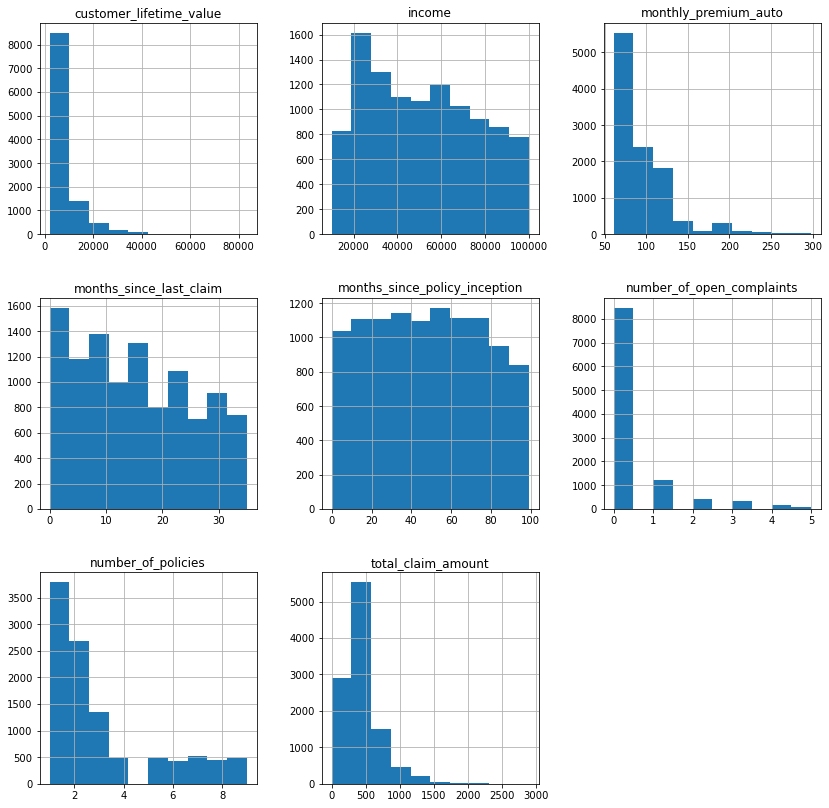

In [48]:
hk_df.hist(figsize=(14,14))

In [49]:
df_num = hk_df._get_numeric_data()
#df_num1 = df_num.drop(['number_of_open_complaints', 'number_of_policies' ], axis=1)
#df_num1


In [50]:
colnames_numerics_only = df_num.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

### Predictive Modeling

#### X-y split (y is the target variable which is the total claim amount)

In [51]:
X=df_num.drop(['total_claim_amount'], axis=1)
y=df_num.total_claim_amount

In [52]:
#X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


<b>Data Splitting

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
X_train, X_test, y_train, y_test

(       customer_lifetime_value  income  monthly_premium_auto  \
 6608                      7271   20545                    70   
 5697                      5079   70474                    68   
 10524                     4428   58577                   110   
 397                      22332   49078                    97   
 6324                      2430   26182                    70   
 ...                        ...     ...                   ...   
 9785                      3086   73938                    76   
 7763                      5658   78834                    72   
 5218                      2434   23033                    62   
 1346                     23594   76358                    66   
 3582                     16236   68955                    74   
 
        months_since_last_claim  months_since_policy_inception  \
 6608                        23                             86   
 5697                         6                             95   
 10524              

### (optional) remove the outliers from the numerical columns.

In [54]:
#df_num

In [55]:
df_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,8011.906727,51750.243989,93.190196,15.144073,48.100571,0.384975,2.980821,434.227243
std,6877.557889,24778.053035,34.413111,10.086110,27.934300,0.910210,2.399497,292.550878
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4014.000000,29335.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,5776.000000,50398.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8991.000000,72131.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


To know which numerical variables we have to select to remove the outliers, we can visualize with boxplot the data and the outliers.

Identifying Outliers with Interquartile Range (IQR)
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [56]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

customer_lifetime_value           4977.0
income                           42796.0
monthly_premium_auto                41.0
months_since_last_claim             17.0
months_since_policy_inception       47.0
number_of_open_complaints            0.0
number_of_policies                   3.0
total_claim_amount                 278.0
dtype: float64


This tells us that the middle 50% of values in the dataset have a spread of $4977 for the customer lifetime_value and so on.
type(Q1)

The above output prints the IQR scores, which can be used to detect outliers. The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.

In [57]:
#print(df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))

Identifying Outliers with Visualization/n
way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers. The line of code below plots the box plot of the numeric variable 'Loan_amount'.

<AxesSubplot:>

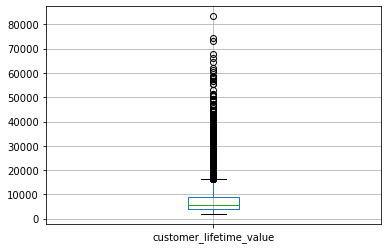

In [58]:
df_num.boxplot(column='customer_lifetime_value')

<AxesSubplot:>

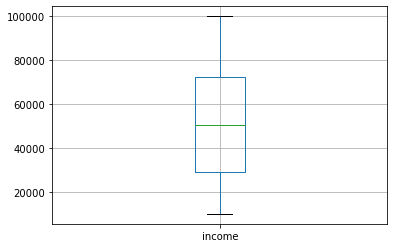

In [59]:
df_num.boxplot(column='income')

<AxesSubplot:>

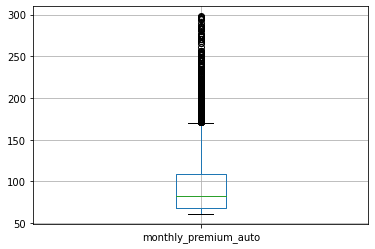

In [60]:
df_num.boxplot(column='monthly_premium_auto')

<AxesSubplot:>

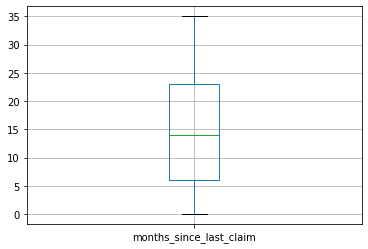

In [61]:
df_num.boxplot(column='months_since_last_claim')

<AxesSubplot:>

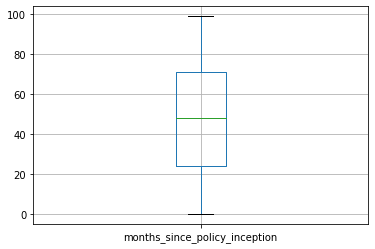

In [62]:
df_num.boxplot(column='months_since_policy_inception')

<AxesSubplot:>

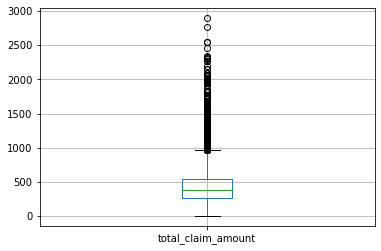

In [63]:
df_num.boxplot(column='total_claim_amount')

In [64]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [65]:
remove_outlier_IQR(df_num)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61.0,7,52,0.0,NaN,292.0
1,2228.0,92260,64.0,3,26,0.0,1.0,744.0
2,14947.0,22139,100.0,34,31,0.0,2.0,480.0
3,NaN,49078,97.0,10,3,0.0,2.0,484.0
4,9025.0,23675,117.0,33,31,0.0,7.0,707.0
...,...,...,...,...,...,...,...,...
10684,15563.0,61541,NaN,12,40,0.0,7.0,NaN
10685,5259.0,61146,65.0,7,68,0.0,6.0,273.0
10686,NaN,39837,NaN,11,63,0.0,2.0,381.0
10687,11971.0,64195,158.0,0,27,NaN,6.0,618.0


# Activity 2
(Wednesday)

1. Linear Regression
    1. Train-test split.(look in the activity 1)
    2. Standardize the data (after the data split).
    3. Apply linear regression.
    4. Model Interpretation.

## Linear Regression

### Standarize the data

In [66]:
#fit is to find the right parameters for the z function (in this case mean and standard deviation)
std_scaler = StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
#transform function compute the result for z function.
X_train_scaled=std_scaler.transform(X_train)

In [67]:
type(std_scaler)

sklearn.preprocessing._data.StandardScaler

In [68]:
type(X_train_scaled)

numpy.ndarray

In [69]:
X_train.shape

(7482, 7)

In [70]:
X_test_scaled = std_scaler.transform(X_test)
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]


### Apply linear regression.

####  Modeling using Scikit Learn

Model fitting

In [71]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

#### Model parameters  ( b1,b2,b3,b4) and the intercept value b

In [72]:
print('The coefficients/parameters of the model are: ')
model.coef_

The coefficients/parameters of the model are: 


array([ -6.5986299 , -33.18126217, 187.80190938,   1.90598135,
        -0.91148552,   1.71705592,  -2.32015745])

In [73]:
print('The intercept value(b) of the model is: ')
model.intercept_

The intercept value(b) of the model is: 


433.0597433841219

#### Model Interpretation

<b> array([ -6.73206342, -33.11725893, 187.88680342,   1.93370336,
        -0.87551921])
    
* 'customer_lifetime_value'= we can say that more negative is this values then the 'Total claim amount'is influenced.
* 'income',
* 'monthly_premium_auto'= we can see that the value for the parameter b3 could affect in a significative way the total_claim_amount. If we increasing by 1 month will cost me $187
* 'months_since_last_claim',
* 'months_since_policy_inception'

#### Making prediction

In [74]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [75]:
y_pred

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [76]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


### Predicting on new data

In [77]:
## new record 
new_data=[2000,2500,100,25,12,1,1]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,7))

/Users/adamkoziak/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
np.array(np.array(new_data).reshape(-1,7)).shape

(1, 7)

In [79]:
print('The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12')
model.predict(new_data_scaled)

The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12


array([548.17496464])

## Model Validation - Evaluating Model Performance

In [80]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [81]:
y_pred

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

### Evaluating model with plots

#### Scatter plot y_pred vs y , histogram of the residuals and Residuals by Predicted

In [82]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

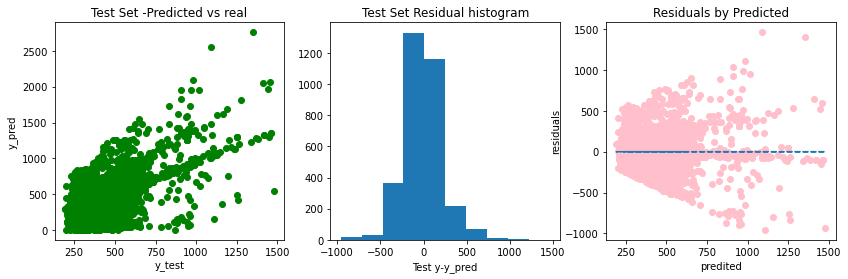

In [83]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test,'o',  color= 'green')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o", color = 'pink')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

1. Linearility, We have a 45 degrees, good alineation between the y_test and y_pred 
2. The errors follow a normal distribution. I look the y_test-y_predict, im showing the error with the histogram and we can see a normal distribution (my errors follow a normal distribution: normality of residuals), with mean 0, and maybe standard deviation
3. The variance follows a constant/linear behaviour. The errors of my predictions are, the variace, how the data is disperse; We can see the variance is constant=equivalente (orange line)

<b> more fancy using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

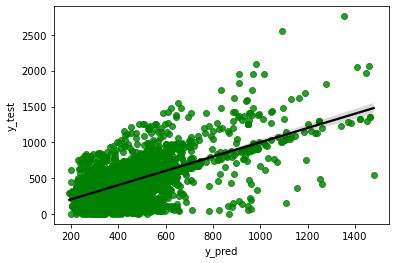

In [84]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "green"}, line_kws={"color": "black"})

### Error metrics

#### MSE (Mean Square Error) & MAE(Mean Absolute Error)

In [85]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

49433.00247202497
152.02992302782081


In [86]:
##prediction on the train set
mse(y_train,y_pred_train)

51007.93558508785

#### R-Squared is also termed the standardized version of MSE

In [87]:
%%html
<img src="R_Squared_Computation.png", width=600,height=600>

R-squared is always between 0 and 100%:

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.
Usually, the larger the R2, the better the regression model fits your observations.

In [88]:
R2=r2_score(y_test,y_pred)
R2

0.40738490678489503

In [89]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
R2_test

0.40738490678489503

###  getting the number of parameters 

In [90]:
X_test.shape[1]

7

In [91]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.40608815603387727

#### Feature Importance

In [92]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [93]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.801909
1,income,33.181262
0,customer_lifetime_value,6.598630
6,number_of_policies,2.320157
3,months_since_last_claim,1.905981
5,number_of_open_complaints,1.717056
4,months_since_policy_inception,0.911486


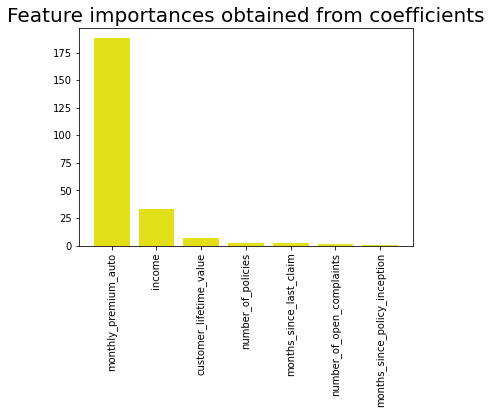

In [94]:
plt.bar(x=features_importances['Attribute'], height = features_importances['Importance'], color='#e3e019')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
cat_val

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [96]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


# Activity 3- categorical  & numerical variables after test

##  Concatenating

In [97]:
df1 = df_num.drop(['total_claim_amount'], axis=1)
df2 = cat_val

frames =[df1, df2]
df_concat = pd.concat(frames,axis =1, join = 'inner')


In [98]:
df_concat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,0,0,1,...,1,0,0,0,0,0,1,0,1,0


## Normalization/standarization data with minmax

In [99]:
# copy the data
df_min_max_scaled = df_concat.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

    #view normalized data
print(df_min_max_scaled)

       customer_lifetime_value    income  monthly_premium_auto  \
0                     0.035750  0.422396              0.000000   
1                     0.004053  0.914158              0.012658   
2                     0.160254  0.134550              0.164557   
3                     0.250949  0.434059              0.151899   
4                     0.087526  0.151628              0.236287   
...                        ...       ...                   ...   
10684                 0.167819  0.572623              0.810127   
10685                 0.041276  0.568231              0.016878   
10686                 0.270119  0.331317              0.590717   
10687                 0.123706  0.602130              0.409283   
10688                 0.060901  0.654907              0.168776   

       months_since_last_claim  months_since_policy_inception  \
0                     0.200000                       0.525253   
1                     0.085714                       0.262626   
2           

## Data splitting

In [100]:
X_c=df_min_max_scaled 
y_c=df_num.total_claim_amount


In [101]:
X_train_c, X_test_c, y_train, y_test = train_test_split(X_c, y_c, test_size=.30,random_state=123)
X_train_c, X_test_c, y_train, y_test

(       customer_lifetime_value    income  monthly_premium_auto  \
 6608                  0.065985  0.116828              0.037975   
 5697                  0.039066  0.671940              0.029536   
 10524                 0.031071  0.539669              0.206751   
 397                   0.250949  0.434059              0.151899   
 6324                  0.006533  0.179501              0.037975   
 ...                        ...       ...                   ...   
 9785                  0.014590  0.710453              0.063291   
 7763                  0.046176  0.764887              0.046414   
 5218                  0.006583  0.144490              0.004219   
 1346                  0.266447  0.737359              0.021097   
 3582                  0.176084  0.655052              0.054852   
 
        months_since_last_claim  months_since_policy_inception  \
 6608                  0.657143                       0.868687   
 5697                  0.171429                       0.959596

## Linear Regression(all data)

In [102]:
model=LinearRegression()    # model
model.fit(X_train_c, y_train)   # model train

LinearRegression()

### Model parameters  ( b1,b2,b3,b4) and the intercept value b

In [103]:
print('The coefficients/parameters of the model are: ')
model.coef_

The coefficients/parameters of the model are: 


array([ 1.17566493e+00, -2.03761264e+01,  1.22443312e+03,  1.77153960e+01,
        1.82721324e+00,  8.70430870e+00, -2.58314020e+00,  8.75854783e+00,
        8.91574996e-01,  5.05338214e+00, -2.69905798e+01, -1.18556712e+01,
       -1.26194636e+01, -7.78571820e+00, -2.07548542e+01,  4.95132530e+00,
       -1.23241159e+01, -8.44519950e+00, -1.19019733e+01, -5.00507742e+00,
        2.16055771e+01, -9.79908711e+00, -2.48972162e+00, -1.10257062e+01,
       -7.43156094e+00, -1.11002593e+01, -1.46993982e+01,  6.94766479e+00,
        1.00951935e+01, -1.06252509e+01,  5.51239994e-01, -1.61091226e+01,
       -3.56099342e+01, -1.59306979e+00,  1.43693804e+01,  3.54458162e+00,
       -2.02292451e+00,  2.35638364e+01,  9.35359150e+00, -1.19031090e+01,
       -2.66112556e+01, -5.53416252e+00,  2.97088023e+00,  3.46502255e+00,
       -1.70248713e+01, -1.28956115e+01, -2.59872023e+01,  1.05324426e+15,
        1.05324426e+15,  1.05324426e+15,  1.05324426e+15,  1.05324426e+15,
        1.05324426e+15,  

In [104]:
print('The intercept value(b) of the model is: ')
model.intercept_

The intercept value(b) of the model is: 


-1053244256054194.2

### Making prediction

In [105]:
y_pred=model.predict(X_test_c)   # model prediction

y_pred_train=model.predict(X_train_c)

In [106]:
y_pred

array([435.875, 397.625, 142.25 , ..., 584.75 , -30.125, 481.75 ])

In [107]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_c.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [108]:
features_importances

,Attribute,Importance
59,effective_to_date_2/20/11,1.053244e+15
69,effective_to_date_2/4/11,1.053244e+15
61,effective_to_date_2/22/11,1.053244e+15
58,effective_to_date_2/2/11,1.053244e+15
66,effective_to_date_2/27/11,1.053244e+15
...,...,...
30,effective_to_date_1/22/11,5.512400e-01
107,vehicle_size_small,4.581997e-01
83,marital_status_married,3.235180e-01
88,policy_corporate l3,2.389849e-01


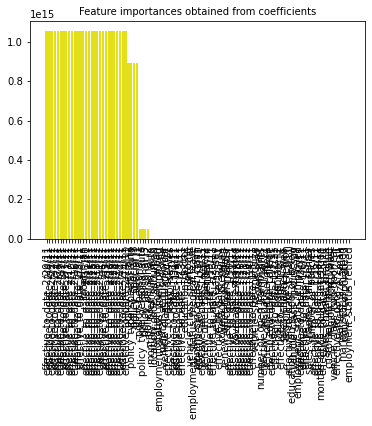

In [109]:
plt.bar(x=features_importances['Attribute'], height = features_importances['Importance'], color='#e3e019')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

### Predicting on new data

In [110]:
## new record 
new_data= np.random.uniform(0, 100, 108)
#new_data=[2000,2500,100,25,12,1,1]
new_data_scaled=np.array(new_data).reshape(-1,108)

In [111]:
np.array(np.array(new_data).reshape(-1,108)).shape

(1, 108)

In [112]:
print('The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12')
model.predict(new_data_scaled)

The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12


/Users/adamkoziak/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.43302918e+18])

In [113]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

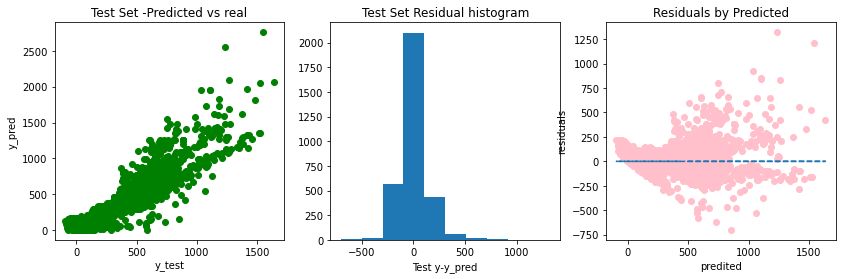

In [114]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test,'o',  color= 'green')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o", color = 'pink')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [115]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

19166.76046051606
95.56661209853445


In [116]:
R2=r2_score(y_test,y_pred)
R2

0.7702241221667994

In [117]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7697213303115844